In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnistdataset/mnist.npz


In [121]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [122]:
# (X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [123]:
import numpy as np

path = '/kaggle/input/mnistdataset/mnist.npz'  # Adjust the path to your upload
with np.load(path) as data:
    X_train, y_train = data['x_train'], data['y_train']
    X_test, y_test = data['x_test'], data['y_test']


In [124]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [125]:
len(X_train[0])

28

In [126]:
import matplotlib.pyplot as plt

In [127]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

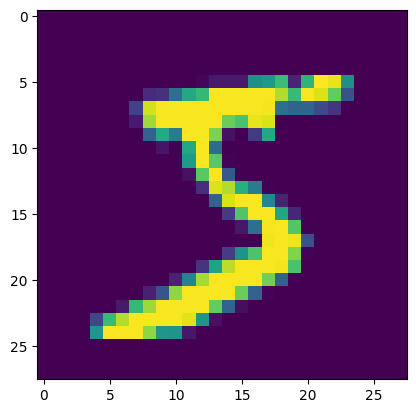

In [128]:
plt.imshow(X_train[0])

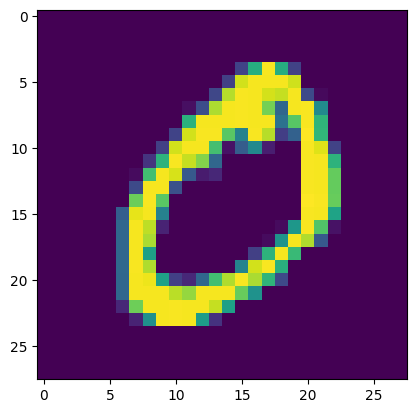

In [129]:
plt.imshow(X_train[1])

In [130]:
X_train = X_train/255
X_test = X_test/255

In [131]:
X_test.max()

1.0

In [132]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

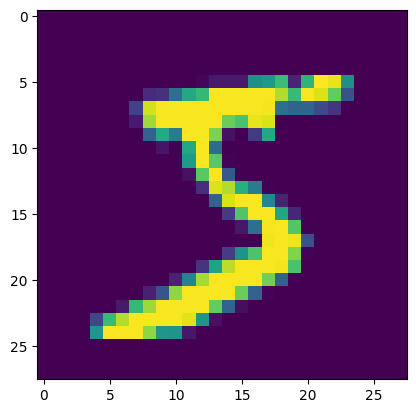

In [133]:
plt.imshow(X_train[0])

In [134]:
model = Sequential()

In [135]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [136]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [139]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.4702 - val_accuracy: 0.9581 - val_loss: 0.1535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9599 - loss: 0.1354 - val_accuracy: 0.9655 - val_loss: 0.1196
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9736 - loss: 0.0898 - val_accuracy: 0.9689 - val_loss: 0.1020
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9806 - loss: 0.0649 - val_accuracy: 0.9678 - val_loss: 0.1015
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9704 - val_loss: 0.0971
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9885 - loss: 0.0396 - val_accuracy: 0.9747 - val_loss: 0.0876
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0296 - val_accuracy: 0.9746 - val_loss: 0.0865
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9927 - loss: 0.0243 - 

In [140]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.00588748e-09, 1.59799451e-09, 1.27882664e-08, ...,
        9.99998271e-01, 4.41703989e-08, 7.77888118e-08],
       [3.07592636e-08, 1.44027197e-03, 9.98559654e-01, ...,
        3.76750599e-14, 1.37434043e-07, 1.69368325e-15],
       [1.85941872e-06, 9.98120248e-01, 8.90238953e-05, ...,
        1.21596211e-03, 5.02477749e-04, 1.01947614e-06],
       ...,
       [9.83184550e-20, 4.36488241e-14, 1.72974496e-14, ...,
        4.43077103e-10, 1.87494487e-09, 4.45348025e-09],
       [2.86790414e-14, 1.66843552e-15, 1.81036500e-15, ...,
        3.32660967e-15, 1.46847015e-07, 1.40288955e-17],
       [1.05287479e-09, 6.15805421e-14, 4.49707049e-10, ...,
        1.75277968e-15, 2.85870130e-11, 2.31110674e-15]], dtype=float32)

In [141]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_prob

In [142]:
y_prob[0]

array([1.00588748e-09, 1.59799451e-09, 1.27882664e-08, 1.56566978e-06,
       2.59920733e-14, 2.33313147e-09, 1.56621976e-13, 9.99998271e-01,
       4.41703989e-08, 7.77888118e-08], dtype=float32)

In [143]:
y_prid = y_prob.argmax(axis=1)

In [144]:
y_prid

array([7, 2, 1, ..., 4, 5, 6])

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(y_test, y_prid)

0.9746

In [147]:
history.history

{'accuracy': [0.9181874990463257,
  0.9620000123977661,
  0.9736666679382324,
  0.979604184627533,
  0.984250009059906,
  0.9872708320617676,
  0.9897708296775818,
  0.9921875,
  0.9938750267028809,
  0.9939374923706055],
 'loss': [0.2850152850151062,
  0.12932118773460388,
  0.08872116357088089,
  0.06647812575101852,
  0.05241214111447334,
  0.04108377546072006,
  0.0336470827460289,
  0.02554229460656643,
  0.020555628463625908,
  0.018282828852534294],
 'val_accuracy': [0.9580833315849304,
  0.965499997138977,
  0.968916654586792,
  0.9677500128746033,
  0.9704166650772095,
  0.9746666550636292,
  0.9745833277702332,
  0.9755833148956299,
  0.9744166731834412,
  0.9740833044052124],
 'val_loss': [0.1534748375415802,
  0.11959453672170639,
  0.1020255833864212,
  0.10148419439792633,
  0.09709452092647552,
  0.08756526559591293,
  0.08653251081705093,
  0.08483798801898956,
  0.09267175942659378,
  0.09692084044218063]}

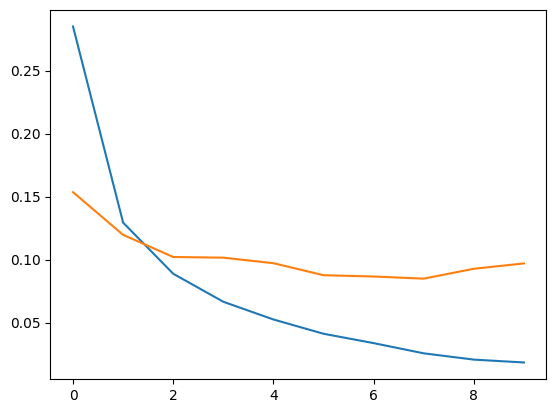

In [148]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


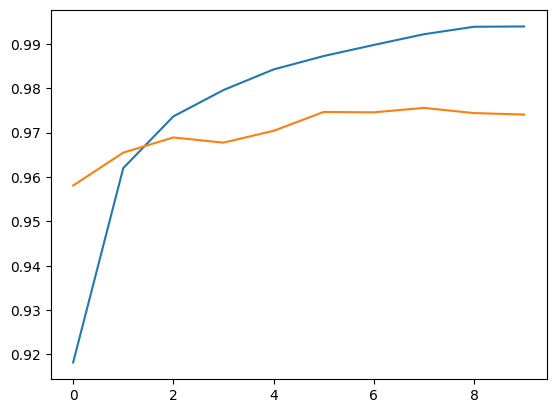

In [149]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

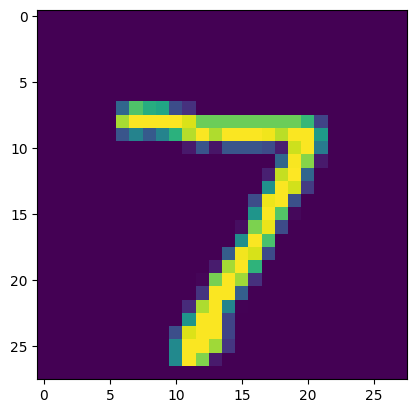

In [150]:
plt.imshow(X_test[0])

In [152]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([7])

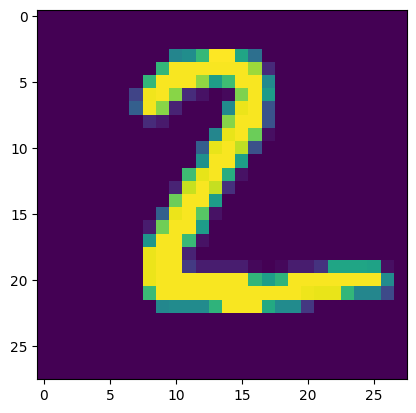

In [153]:
plt.imshow(X_test[1])

In [154]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([2])